<h1>Work-Life Balance Prediction</h1>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from atusfunclib import load_data

In [3]:
# Import all csv data
data_inport = load_data(loc='data')

In [4]:
# Unpack individual dataframes
df, dfactcodes, dfeducodes, dfinccodes, dfagecodes = data_inport[:5]
dfempcodes, dfindcodes, dfraccodes, dfloccodes, dfwhocodes = data_inport[5:]

<p>Initially checking the variation of different activities as a function of demographic groups. The color indicates the normailized deviation from the mean of the activity time over all groups.</p>

In [5]:
# Group by (fiter by respondents age >= 18)
df_byedu = df[df.TEAGE >= 18].groupby('PEEDUCA')
df_byage = df[df.TEAGE >= 18].groupby('TEAGE_CAT')
df_byocc = df[df.TEAGE >= 18].groupby('TRDTOCC1')
df_byinc = df[df.TEAGE >= 18].groupby('TRERNWA_CAT')

In [6]:
# Filtered dataframes by age >18 and excluding NA values
dfedu_filtered = df[df.TEAGE >= 18].dropna(subset=['PEEDUCA'])
dfage_filtered = df[df.TEAGE >= 18].dropna(subset=['TEAGE_CAT'])
dfocc_filtered = df[df.TEAGE >= 18].dropna(subset=['TRDTOCC1'])
dfinc_filtered = df[df.TEAGE >= 18].dropna(subset=['TRERNWA_CAT'])

In [7]:
# Average activity times by group
a_byedu = df_byedu.sum().filter(like='_W').filter(like='t').divide(df_byedu.TUFNWGTP.sum(), axis='index')
a_byage = df_byage.sum().filter(like='_W').filter(like='t').divide(df_byage.TUFNWGTP.sum(), axis='index')
a_byocc = df_byocc.sum().filter(like='_W').filter(like='t').divide(df_byocc.TUFNWGTP.sum(), axis='index')
a_byinc = df_byinc.sum().filter(like='_W').filter(like='t').divide(df_byinc.TUFNWGTP.sum(), axis='index')

In [8]:
# Average minutes per day on a particular activity (across all groups)
sum_of_weights_edu = dfedu_filtered.TUFNWGTP.sum()
a_mean_edu = dfedu_filtered.filter(like='_W').filter(like='t').sum() / sum_of_weights_edu

sum_of_weights_age = dfage_filtered.TUFNWGTP.sum()
a_mean_age = dfage_filtered.filter(like='_W').filter(like='t').sum() / sum_of_weights_age

sum_of_weights_occ = dfocc_filtered.TUFNWGTP.sum()
a_mean_occ = dfocc_filtered.filter(like='_W').filter(like='t').sum() / sum_of_weights_occ

sum_of_weights_inc = dfinc_filtered.TUFNWGTP.sum()
a_mean_inc = dfinc_filtered.filter(like='_W').filter(like='t').sum() / sum_of_weights_inc

In [9]:
# Deviations of Averages by group from Average for all groups
a_byedu_deviation = a_byedu / a_mean_edu - 1.0
a_byage_deviation = a_byage / a_mean_age - 1.0
a_byocc_deviation = a_byocc / a_mean_occ - 1.0
a_byinc_deviation = a_byinc / a_mean_inc - 1.0

<p>Examples of different activities that are of interest in terms of work-life balance:</p>
<p>
<table>
<tr><th>Positive</th><th>Negative (paid)</th><th>Negative (unpaid)</th></tr>
<tr>
<td>Sleeping<br>Grooming<br>Health-related self care<br>Eating and Drinking<br>Socializing and Communicating<br>Relaxing and Leisure</td>
<td>Working<br>Job Search and Interviewing<br>Travel Related to Work</td>
<td>Housework<br>Household Management<br>Maintenance, Repair and Decoration<br>Caring For and Helping Children</td>
</tr>
</table>
</p>

In [10]:
# Activities that we are intersted in plotting
positiveWL = ['010101', '0102', '0103', '050201',
              '050203', '1101', '1201', '1202',
              '1203', '1204', '1301', '1302', '14']

negoccWL = ['05', '0501', '0504', '1805']

neghomeWL = ['0201', '0202', '0203', '0204', '0209',
             '0301', '0302', '0303', '0304', '0305',
             '0802', '0803']

activities = positiveWL + negoccWL + neghomeWL

activities_c = ['t'+ a + '_W' for a in activities]

<p>Grouped by education level</p>

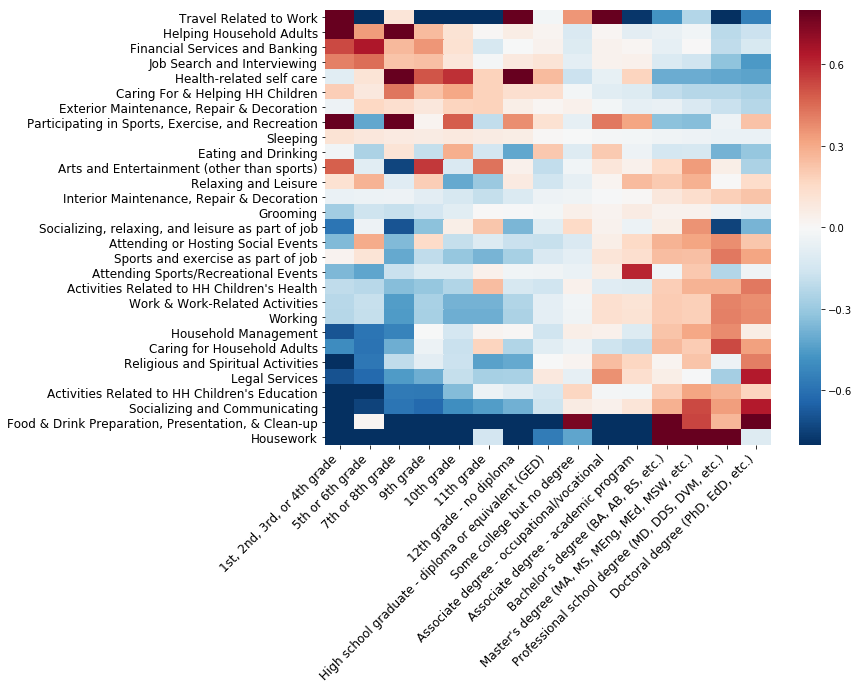

In [15]:
# Setup plot data df for by education level
plotdf1 = a_byedu_deviation[activities_c].T

# Create order by ranking education level from -1 to +1
plotdf1['order'] = plotdf1.multiply(np.linspace(-1,1,num=16)).sum(axis='columns')

# Add activity names
plotdf1['name'] = dfactcodes[dfactcodes.CODE.isin(activities)].NAME.values

# Plot heatmap
plt.figure(figsize=(10, 8))
p = sns.heatmap(plotdf1.sort_values('order').iloc[:,1:-2], vmin=-0.8, vmax=0.8, cmap='RdBu_r')
p.set_yticklabels(plotdf1.sort_values('order').name,
                 rotation=0,
                 fontsize=12)
p.set_xticklabels(dfeducodes.NAME.values[1:],
                  rotation=45,
                  ha='right',
                  fontsize=12)
p.set(xlabel='')
plt.show()

<p>Grouped by income level</p>

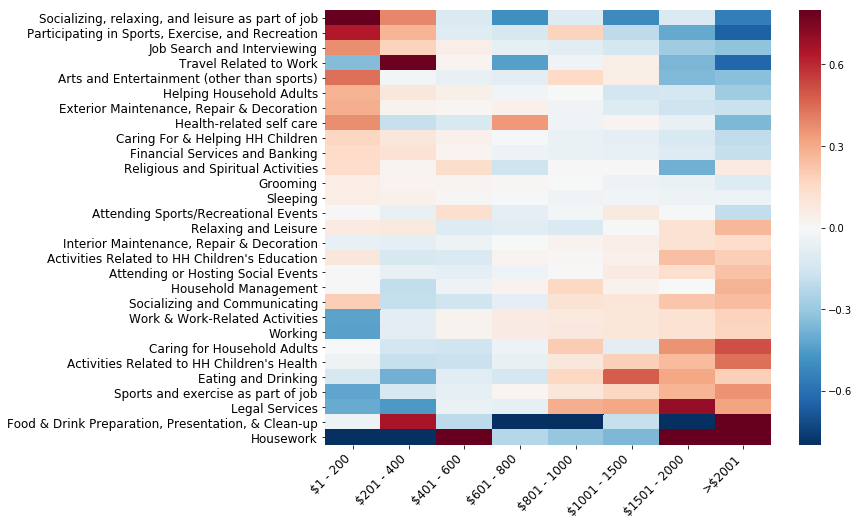

In [12]:
# Setup plot data df for by income
plotdf2 = a_byinc_deviation[activities_c].T

# Create order by ranking education level from -1 to +1
plotdf2['order'] = plotdf2.multiply(np.linspace(-1,1,num=8)).sum(axis='columns')

# Add activity names
plotdf2['name'] = dfactcodes[dfactcodes.CODE.isin(activities)].NAME.values

# Plot heatmap
plt.figure(figsize=(10, 8))
p = sns.heatmap(plotdf2.sort_values('order').iloc[:,:-2], vmin=-0.8, vmax=0.8, cmap='RdBu_r')
p.set_yticklabels(plotdf2.sort_values('order').name,
                 rotation=0,
                 fontsize=12)
p.set_xticklabels(dfinccodes.NAME.values,
                  rotation=45,
                  ha='right',
                  fontsize=12)
p.set(xlabel='')
plt.show()

<p>Grouped by age group</p>

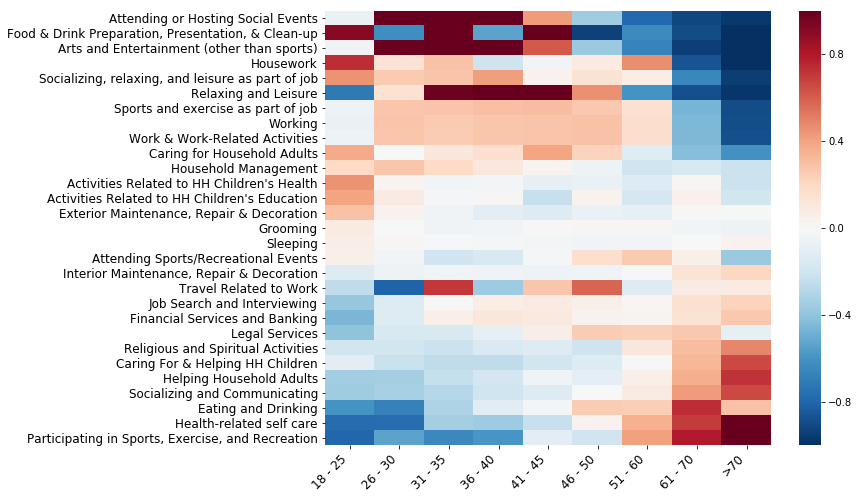

In [14]:
# Setup plot data df for by age group
plotdf3 = a_byage_deviation[activities_c].T

# Create order by ranking education level from -1 to +1
plotdf3['order'] = plotdf3.multiply(np.linspace(-1,1,num=9)).sum(axis='columns')

# Add activity names
plotdf3['name'] = dfactcodes[dfactcodes.CODE.isin(activities)].NAME.values

# Plot heatmap
plt.figure(figsize=(10, 8))
p = sns.heatmap(plotdf3.sort_values('order').iloc[:,:-2], vmin=-1.0, vmax=1.0, cmap='RdBu_r')
p.set_yticklabels(plotdf3.sort_values('order').name,
                 rotation=0,
                 fontsize=12)
p.set_xticklabels(dfagecodes.NAME.values[1:],
                  rotation=45,
                  ha='right',
                  fontsize=12)
p.set(xlabel='')
plt.show()